In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### **Sharpen with OpenCV**

In [2]:
import requests

image_url = "https://media.geeksforgeeks.org/wp-content/uploads/gray.jpeg"

img_data = requests.get(image_url).content
with open('image.jpg', 'wb') as f:
    f.write(img_data)

1) Convertiamo l'immagine in grayscale

In [3]:
image = cv2.imread('image.jpg')
gray_image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

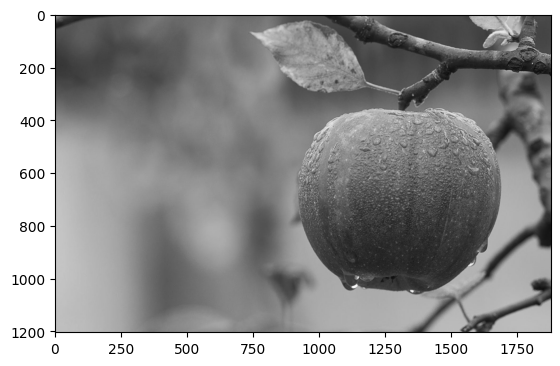

In [4]:
plt.imshow(gray_image, cmap="gray")

In [15]:
def sharpen_filter(k):
    if k % 2 == 0 or k < 3:
        raise ValueError("La dimensione del kernel deve essere un numero dispari maggiore o uguale a 3.")

    # Creiamo un kernel di base con tutti gli elementi pari a -1
    kernel = np.ones((k, k))*-1

    # Calcoliamo l'indice centrale del kernel
    center = k // 2

    # Impostiamo il valore centrale del kernel a k*k
    kernel[center, center] = k * k
    return kernel

# Esempio di utilizzo
k = 3
kernel = sharpen_filter(k)

In [16]:
print(kernel)

[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


In [17]:
filt_image = cv2.filter2D(image, -1, kernel)

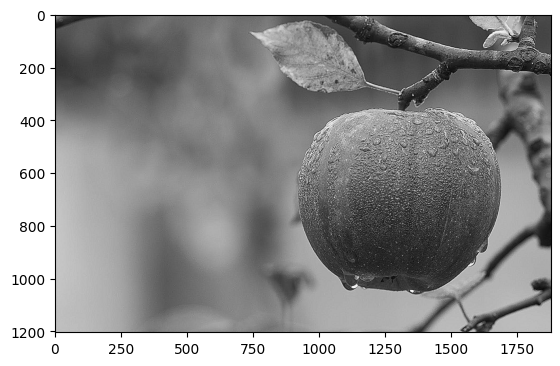

In [18]:
plt.imshow(filt_image, cmap="gray")

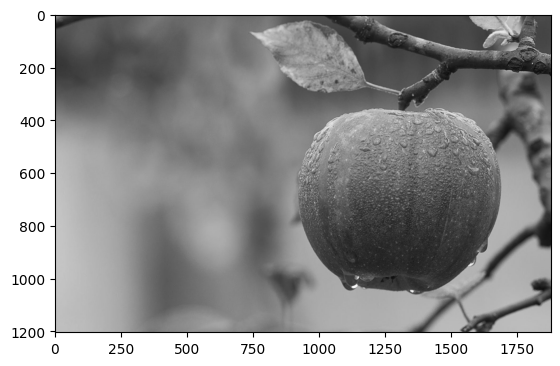

In [19]:
plt.imshow(image, cmap="gray")

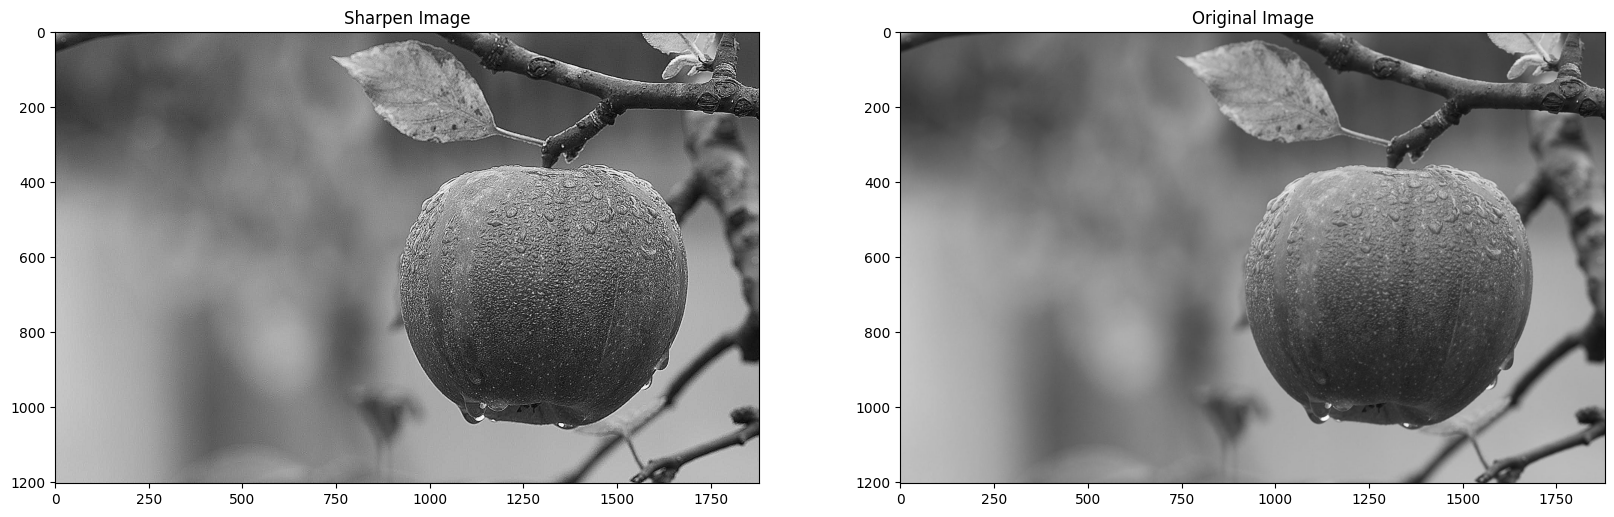

In [20]:
plt.figure(figsize=(20, 16))

plt.subplot(1, 2, 1)
plt.title('Sharpen Image')
plt.imshow(filt_image)

plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(image)

plt.show()